In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [21]:
# # Load the Wine Dataset
df_wine = pd.read_csv("data/winemag-data-130k-v2.csv")

In [22]:
df_wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [23]:
print(df_wine.dtypes)
df_wine.shape

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


(129971, 14)

In [24]:
df_wine = df_wine[['points','price']]

In [25]:
# Finding the columns with NaN values
pd.isnull(df_wine).sum() > 0

points    False
price      True
dtype: bool

In [26]:
# Filling the NaN values with the mean respective columns
df_wine = df_wine.fillna(df_wine.mean())
pd.isnull(df_wine).sum() > 0
df_wine.shape

(129971, 2)

In [27]:
# y as target/dependent variable
y = df_wine['points'].values 

In [28]:
# devide the dataframe for training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_wine, y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(103976, 2) (103976,)
(25995, 2) (25995,)


In [31]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

In [32]:
y_predictions[0:5]

array([87., 87., 91., 91., 92.])

Text(0, 0.5, 'Predictions')

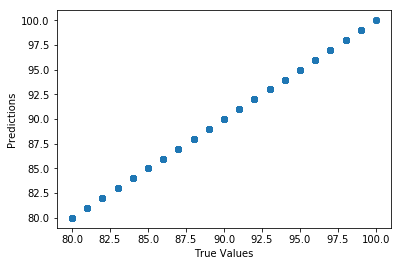

In [33]:
## The line / model
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [34]:
# Accuracy score
print ('Score:', model.score(X_test, y_test))

Score: 1.0


In [35]:
# Root mean squared error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

7.477926802021496e-15


In [36]:
# Mean absolute error (MAE)
print(metrics.mean_absolute_error(y_test, y_predictions))

3.8660959625277385e-15
